In [1]:
import numpy as np

In [2]:
data = np.load('./clipped_data/mdd_control.npy')

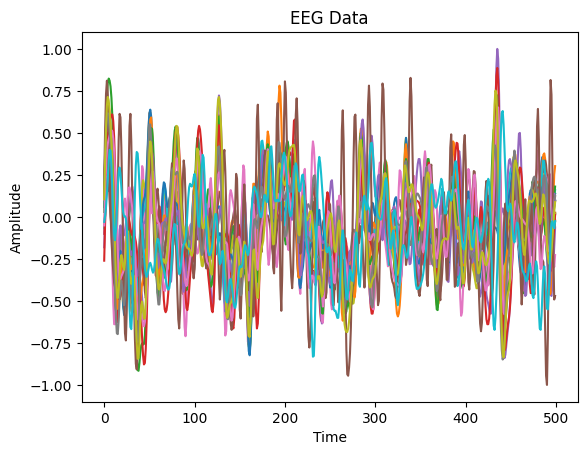

In [3]:
import matplotlib.pyplot as plt
from random import randint

eeg_data = data[100]


# Assuming your EEG data is in a 2D array format where each row is a separate EEG channel
for channel_data in eeg_data:
    plt.plot(channel_data)  # Plot each channel

plt.title('EEG Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


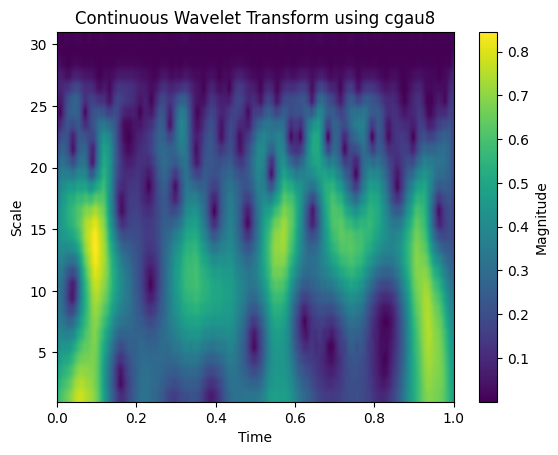

: 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Example signal: A sine wave with frequency modulation
time = np.linspace(0, 1, 1000, endpoint=False)
# signal_data = np.sin(2 * np.pi * 7 * time) + np.sin(2 * np.pi * 13 * time)

# Define scales for the CWT
scales = np.arange(1, 31)

# Perform the CWT using PyWavelets and the 'cgau8' wavelet
coefficients, frequencies = pywt.cwt(eeg_data[0], scales, 'cgau8')

# Plot the CWT result
plt.imshow(np.abs(coefficients), extent=[0, 1, 1, 31], cmap='viridis', aspect='auto')
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform using cgau8')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.show()

